In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import skimage as sk
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
print(tf.__version__)
tf.config.set_visible_devices([], 'GPU')

2.13.0


In [2]:
images = os.listdir("./input")

images = [os.path.splitext(images_num)[0] for images_num in images]
images.sort()
images.pop(0)

images = np.array(images, dtype = int)
images.sort()

images

array([   1,    2,    3, ..., 2685, 2686, 2687])

In [3]:
data_set = np.zeros((len(images),256,256,3))
data_set.shape

for i in range(len(images)) :
    data_set[i-1,:,:,:] = sk.io.imread("./input/"+str(images[i-1])+".jpg") / 255


In [4]:
np.info(data_set)

class:  ndarray
shape:  (2687, 256, 256, 3)
strides:  (1572864, 6144, 24, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x2bfefc000
byteorder:  little
byteswap:  False
type: float64


In [5]:
class_names = ["ocean & sea", "green spaces", "road", "building", "mountains", "plains"]

label_set = np.zeros(len(images))

data_train = np.zeros((1352,256,256,3))
label_train = np.zeros(1352)

data_test = np.zeros((281,256,256,3))
label_test = np.zeros(281)

label_set[0:139] = 0
data_train[0:300,:,:,:] = data_set[:300,:,:,:]
label_train[0:300] = 0
label_train[140] = 1

label_set[140] = 1

label_set[141:358] = 0
data_test[0:58,:,:,:] = data_set[300:358,:,:,:]
label_test[0:58] = 0

label_set[359:686] = 1
data_train[300:541,:,:,:] = data_set[359:600,:,:,:]
data_test[58:143,:,:,:] = data_set[601:686,:,:,:]
label_train[301:542] = 1
label_test[58:143] = 1

label_set[687:946] = 2
data_train[541:754,:,:,:] = data_set[687:900,:,:,:]
data_test[143:188,:,:,:] = data_set[901:946,:,:,:]
label_train[542:755] = 2
label_test[143:188] = 2

label_set[947:1254] = 3
data_train[754:1007,:,:,:] = data_set[947:1200,:,:,:]
data_test[188:241,:,:,:] = data_set[1201:1254,:,:,:]
label_train[755:1008] = 3
label_test[188:241] = 3

label_set[1255:1642] = 4
data_train[1007:1352,:,:,:] = data_set[1255:1600,:,:,:]
data_test[241:281,:,:,:] = data_set[1601:1641,:,:,:]
label_train[1008:1352] = 4
label_test[241:281] = 4

label_test = label_test.astype(int)
label_train = label_train.astype(int)
#label_set[1643:2038] = 5
#data_train[1356:1713,:,:,:] = data_set[1643:2000,:,:,:]
#data_test[288:325,:,:,:] = data_set[2001:2038,:,:,:]

#print(data_test[-1,:,:,:])

label_set = label_set.astype(np.uint8)
# label_set[947]
# data_set.shape
for i in range(58,len(label_test)):
    if label_test[i] == 0 :
       print(i)

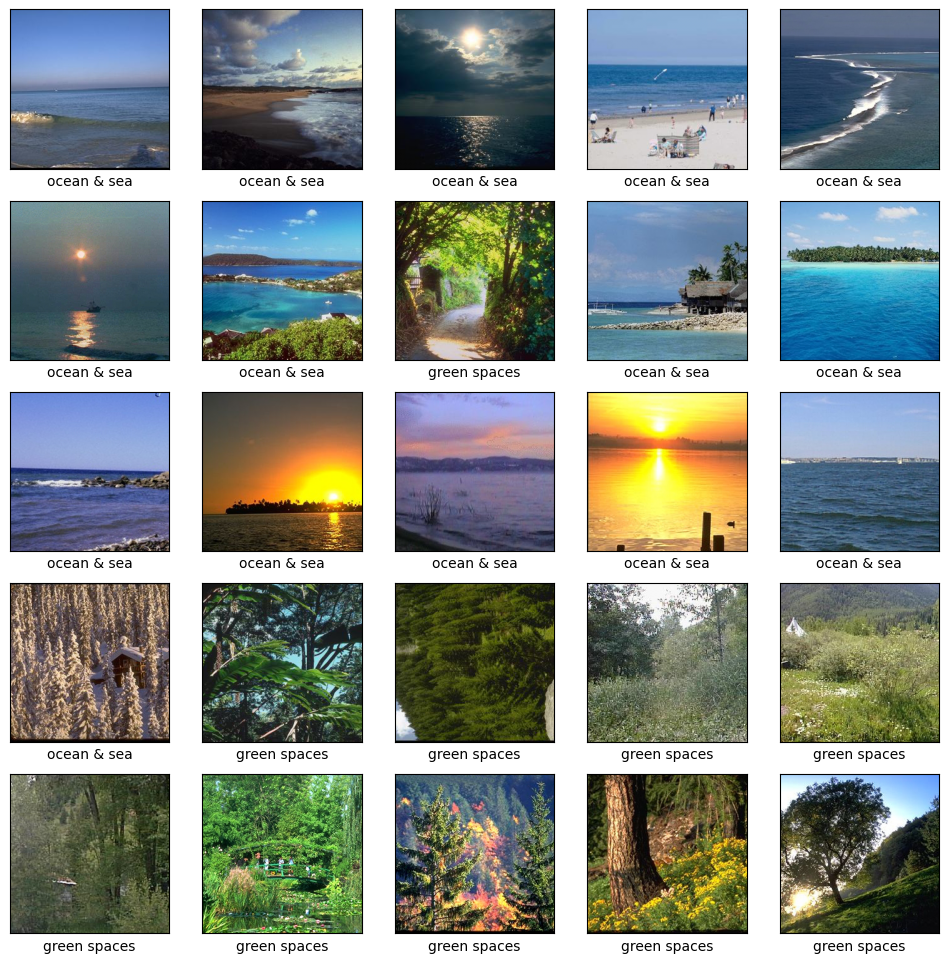

In [6]:
plt.figure(figsize = (12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(data_train[20*i,:,:,:])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[label_train[20*i]])

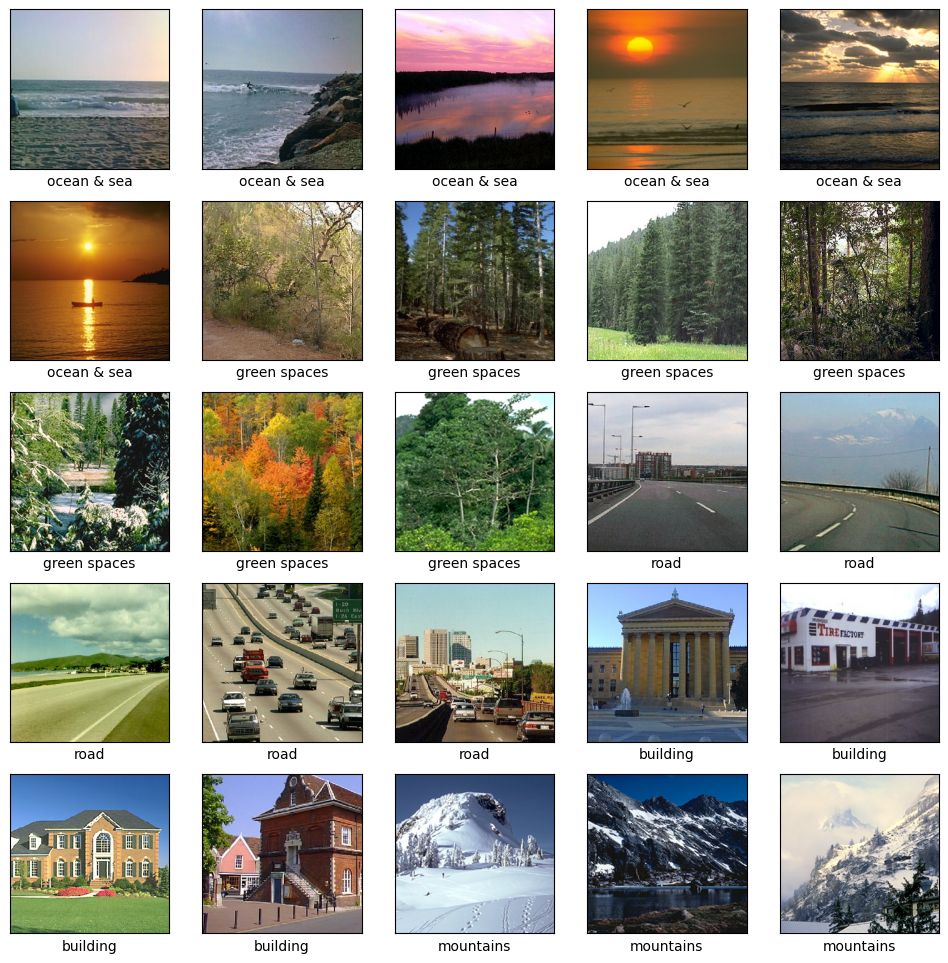

In [7]:
plt.figure(figsize = (12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(data_test[11*i,:,:,:])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[label_test[11*i]])

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (256,256,3)),
    tf.keras.layers.Dense(500, activation = "relu"),
    tf.keras.layers.Dense(150, activation = "relu"),
    tf.keras.layers.Dense(5)])

model.compile(optimizer = 'sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [21]:
hist = model.fit(data_train, label_train, epochs=20,
                validation_data = (data_test, label_test))

Epoch 1/20
43/43 [==============================] - 6s 124ms/step - loss: 0.4931 - accuracy: 0.8410 - val_loss: 3.1423 - val_accuracy: 0.4270
Epoch 2/20
43/43 [==============================] - 5s 119ms/step - loss: 0.5279 - accuracy: 0.8254 - val_loss: 3.2938 - val_accuracy: 0.4698
Epoch 3/20
43/43 [==============================] - 5s 119ms/step - loss: 0.3567 - accuracy: 0.8720 - val_loss: 3.3826 - val_accuracy: 0.4698
Epoch 4/20
43/43 [==============================] - 6s 142ms/step - loss: 0.2999 - accuracy: 0.8920 - val_loss: 3.7373 - val_accuracy: 0.4164
Epoch 5/20
43/43 [==============================] - 6s 142ms/step - loss: 0.3444 - accuracy: 0.8720 - val_loss: 3.5064 - val_accuracy: 0.3915
Epoch 6/20
43/43 [==============================] - 6s 136ms/step - loss: 0.3436 - accuracy: 0.8898 - val_loss: 3.5347 - val_accuracy: 0.4306
Epoch 7/20
43/43 [==============================] - 6s 127ms/step - loss: 0.2436 - accuracy: 0.9061 - val_loss: 3.1696 - val_accuracy: 0.4875
Epoch 

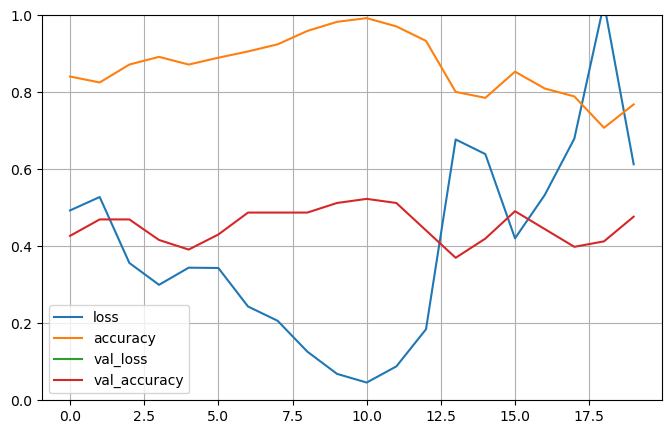

In [23]:
pd.DataFrame(hist.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [24]:
test_loss, test_acc = model.evaluate(data_test, label_test, verbose = 2)

9/9 - 1s - loss: 2.1093 - accuracy: 0.4769 - 575ms/epoch - 64ms/step


In [25]:
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()])

In [26]:
predictions = prob_model.predict(data_test)
print("True label : ", class_names[int(label_test[100])],"\n" )
print("Predicted label :",class_names[np.argmax(predictions[100])])

9/9 [==============================] - 1s 51ms/step
True label :  green spaces 

Predicted label : green spaces


In [27]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.xticks(range(5))
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

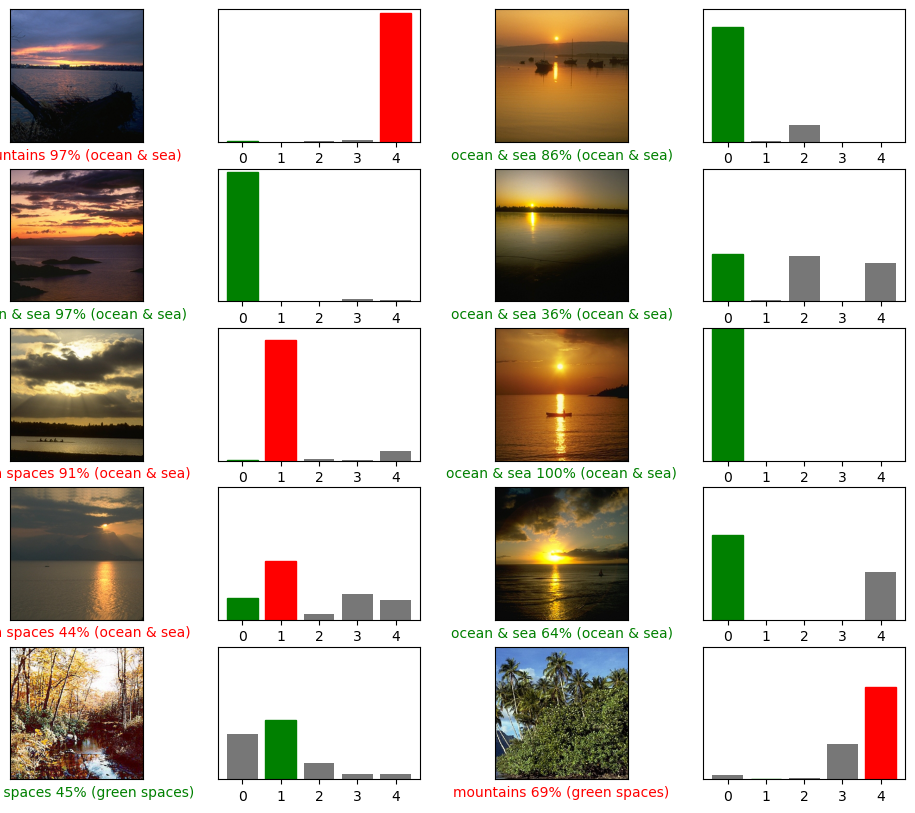

In [28]:
plt.figure(figsize=(12,10))
for i in range(10):
    plt.subplot(5,4,2*i+1)
    plot_image(i+50, predictions[i+50], label_test, data_test)
    plt.subplot(5,4,2*i+2)
    plot_value_array(i+50, predictions[i+50],  label_test)
plt.show()